Data Date Range:
    <br />Start time: 2016-05-05 09:40:26
    <br />End time: 2018-01-17 01:59:42
    
#### This notebook does the following analysis:

- Distribution of the popularity, avgRating, age of recommendations, broken down by Algorithm
- Distribution of the age (until current date) of unique recommendations, broken down by Algorithm
- Visualize each property (age,avgRating,popularity) of unique recommendations against each other


### Import

In [1]:
import pandas as pd
import numpy as np

import math

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

The ratio of rec_played/total_played is a helpful metric to understand users' engagements in a session. 

### Distribution of the popularity, avgRating, age of all recommendations, broken down by Algorithm

In [27]:
# rec_movieinfo_small = pd.read_csv('../Clean_Data/rec_movieinfo_wpopularity_agemonth_validRatings.csv')
rec_movieinfo_small = pd.read_csv('../Clean_Data/rec_seed_info.csv')

rec_movieinfo_small.loc[rec_movieinfo_small.Algorithm == 'ShuffledTopPicks', 'Algorithm'] = 'Baseline'

# rec_movieinfo_small = rec_movieinfo.drop('Unnamed: 0',axis=1).dropna()

In [6]:
rec_movieinfo_small.dtypes

Algorithm                        object
SeedMovie                         int64
loginId                          object
movieId                           int64
sessionIds                        int64
userId                            int64
avgRating                       float64
popularityLastYear              float64
avgRating_seedmovie             float64
popularityLastYear_seedmovie    float64
age_month                       float64
age_seedmovie_month             float64
dtype: object

In [8]:
#Drop na values
rec_movieinfo_small.dropna(inplace=True)

The 'age' here is the time difference between film release date and view date

In [9]:
rec_movieinfo_small.groupby('Algorithm').count()

,SeedMovie,loginId,movieId,sessionIds,userId,avgRating,popularityLastYear,avgRating_seedmovie,popularityLastYear_seedmovie,age_month,age_seedmovie_month
Algorithm,,,,,,,,,,,
Baseline,505553,505553,505553,505553,505553,505553,505553,505553,505553,505553,505553
FilmReleaseDate,417373,417373,417373,417373,417373,417373,417373,417373,417373,417373,417373
PredictedRating,429927,429927,429927,429927,429927,429927,429927,429927,429927,429927,429927
TagSimilarity,426183,426183,426183,426183,426183,426183,426183,426183,426183,426183,426183


#### Find quartiles of popularity for each algorithm 

In [10]:
rec_movieinfo_small.groupby('Algorithm').quantile(0.25)

0.25,SeedMovie,age_month,age_seedmovie_month,avgRating,avgRating_seedmovie,movieId,popularityLastYear,popularityLastYear_seedmovie,sessionIds,userId
Algorithm,,,,,,,,,,
Baseline,5956.0,84.93,33.0,3.01,3.28,314.0,7.0,36.0,1.0,268172.0
FilmReleaseDate,4380.0,12.30,46.0,3.28,3.37,115569.0,97.0,96.0,1.0,273911.0
PredictedRating,4299.0,72.03,46.0,3.61,3.37,2329.0,228.0,88.0,1.0,270699.0
TagSimilarity,4370.0,88.30,48.0,3.34,3.37,3224.0,43.0,94.0,1.0,271347.0


In [11]:
rec_movieinfo_small.groupby('Algorithm').quantile(0.5)

0.5,SeedMovie,age_month,age_seedmovie_month,avgRating,avgRating_seedmovie,movieId,popularityLastYear,popularityLastYear_seedmovie,sessionIds,userId
Algorithm,,,,,,,,,,
Baseline,71991.0,243.83,103.0,3.34,3.62,27238.0,85.0,192.0,3.0,292078.0
FilmReleaseDate,54503.0,19.83,119.0,3.59,3.67,136016.0,204.0,277.0,2.0,292894.0
PredictedRating,53972.0,164.50,120.0,3.85,3.67,7587.0,884.0,277.0,3.0,291599.0
TagSimilarity,53123.0,168.97,120.0,3.65,3.67,7981.0,174.0,287.0,3.0,292367.0


In [9]:
rec_movieinfo_small['Algorithm'] = pd.Categorical(rec_movieinfo_small['Algorithm'], categories=["Baseline", "TagSimilarity", "FilmReleaseDate","PredictedRating"])

In [12]:
rec_movieinfo_small.sort_values(by="Algorithm",inplace=True)

,Algorithm,SeedMovie,loginId,movieId,sessionIds,userId,avgRating,popularityLastYear,avgRating_seedmovie,popularityLastYear_seedmovie,age_month,age_seedmovie_month
1373994,TagSimilarity,73168,szRcDGQ,140131,4,299053,3.02,16.0,3.18,49.0,18.47,89.0
1373993,TagSimilarity,87192,szRcDGQ,4492,3,299053,2.75,43.0,3.41,215.0,378.13,66.0
1373992,TagSimilarity,87192,szRcDGQ,5833,3,299053,3.34,56.0,3.41,215.0,179.03,66.0
1374022,TagSimilarity,54686,szRcDGQ,119655,6,299053,2.75,101.0,2.79,27.0,25.57,114.0
889517,TagSimilarity,8854,kIuZEoa,8225,1,284832,3.35,47.0,2.98,17.0,316.43,350.0


### Visualize AvgRating of recommendations made by each algorithm

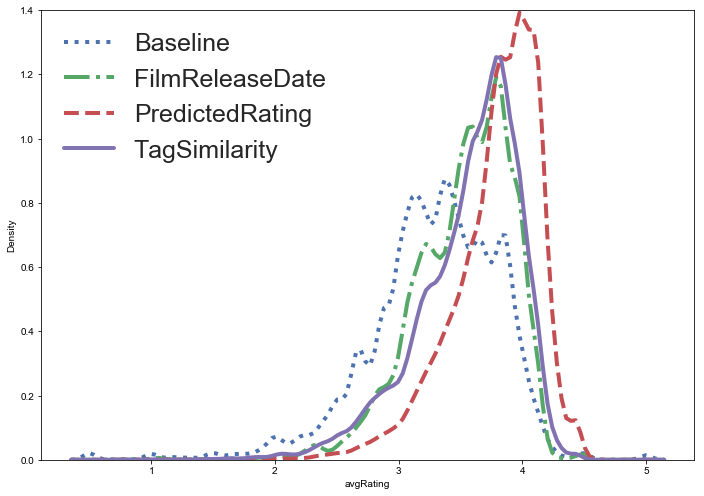

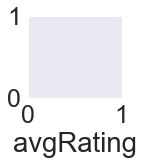

In [13]:
fig2, ax2 = plt.subplots()
# the size of A4 paper
fig2.set_size_inches(11.7, 8.27)
sns.set(font_scale=2.5)
sns.set_context(rc={"lines.linewidth": 4})

g = sns.FacetGrid(rec_movieinfo_small, hue="Algorithm",hue_kws={"ls" : [":", "-.","--","-"]})
g = g.map(sns.kdeplot, "avgRating", bw=0.05, ax=ax2,)
ax2.set_xlabel("avgRating")
ax2.set_ylabel("Density")
ax2.set_ylim(0,1.4)
sns.set_style("white")


# g = g.map(sns.distplot, "avgRating", hist=False, ax=ax2)

### Visualize ageMonth of recommendations made by each algorithm

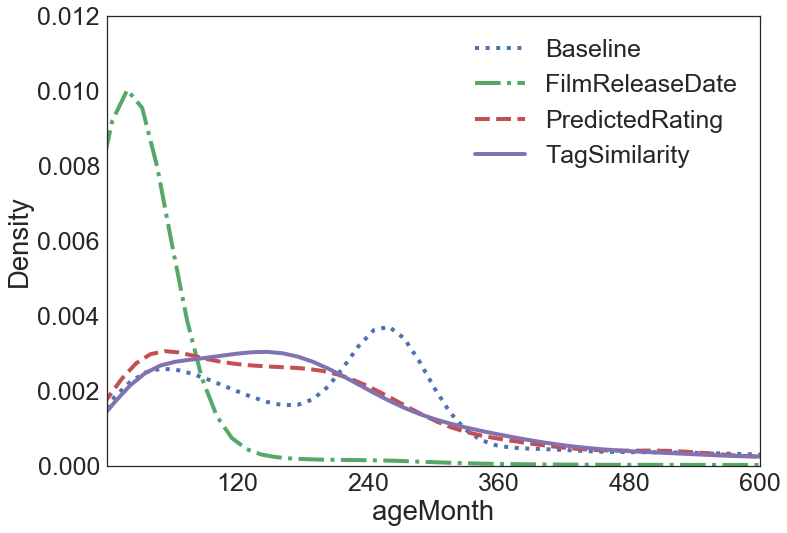

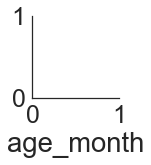

In [14]:
fig3, ax3 = plt.subplots()
# the size of A4 paper
fig3.set_size_inches(11.7, 8.27)

g = sns.FacetGrid(rec_movieinfo_small, hue="Algorithm",hue_kws={"ls" : [":", "-.","--","-"]})
# g.axes[0,0].set_ylim(0,0.0020)

# g = g.map(sns.distplot, "age_month", hist=False, ax=ax3)
g = g.map(sns.kdeplot, "age_month", bw=35, ax=ax3)
ax3.set_ylim(0,0.012)
ax3.set_xlim(0,600)
ax3.set_xlabel("ageMonth")
ax3.set_ylabel("Density")
# ax3.set_xticks([60,120,180,240,300,360,420,480,540,600])
ax3.set_xticks([120,240,360,480,600])

# sns.set_context(rc={"lines.linewidth": 3.5})


### Visualize popularityLastYear of recommendations made by each algorithm

Text(0,0.5,'Density')

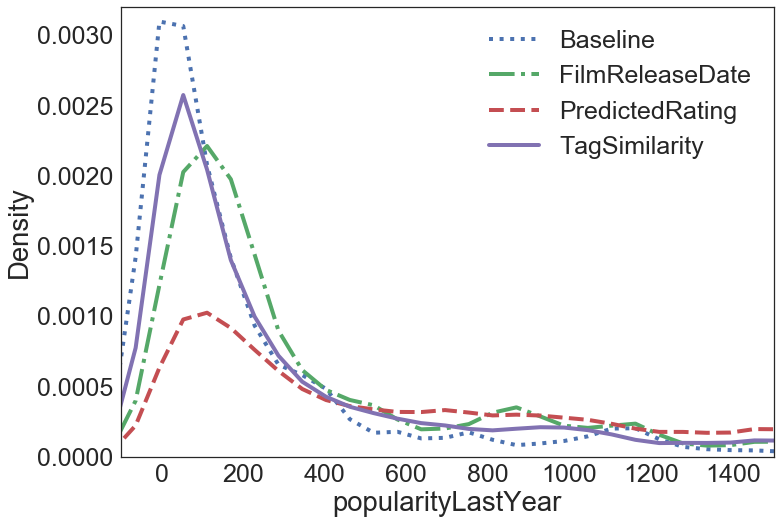

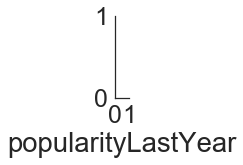

In [15]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

g = sns.FacetGrid(rec_movieinfo_small, hue="Algorithm",hue_kws={"ls" : [":", "-.","--","-"]})
g = g.map(sns.kdeplot, "popularityLastYear", bw=60, ax=ax)
ax.set_xlim(-100, 1500)
ax.set_ylim(0, 0.0032)
ax.set_xlabel("popularityLastYear")
ax.set_ylabel("Density")
# sns.set_context(rc={"lines.linewidth": 3.5})

# g = g.map(sns.distplot, "avgRating", hist=False, ax=ax2)

In [17]:
def savefig(figure, name):
    for fmt in ['pdf', 'eps']:
        fn = "../Graphs/{}.{}".format(name, fmt)
        figure.savefig(fn, format=fmt, dpi=300, bbox_inches='tight', pad_inches=0.1, frameon=True)
        print("saved figure {} as {}".format(figure, fn))

In [18]:
savefig(fig, "Distribution of popularityLastYear2")
savefig(fig2, "Distribution of avgRating2")
savefig(fig3, "Distribution of ageMonth2")

saved figure Figure(842.4x595.44) as ../Graphs/Distribution of popularityLastYear2.pdf
saved figure Figure(842.4x595.44) as ../Graphs/Distribution of popularityLastYear2.eps
saved figure Figure(842.4x595.44) as ../Graphs/Distribution of avgRating2.pdf
saved figure Figure(842.4x595.44) as ../Graphs/Distribution of avgRating2.eps
saved figure Figure(842.4x595.44) as ../Graphs/Distribution of ageMonth2.pdf
saved figure Figure(842.4x595.44) as ../Graphs/Distribution of ageMonth2.eps


#### Distribution of popularityLastYear, by Algorithm

(0, 6000)

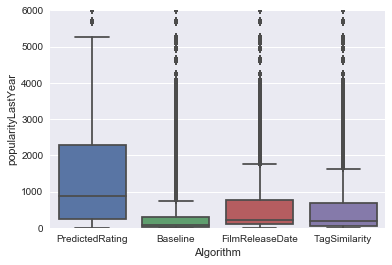

In [28]:
# Boxplot
sns.boxplot(x='Algorithm', y='popularityLastYear', data= rec_movieinfo_small)
sns.set(font_scale=1)

plt.ylim(0, 6000)

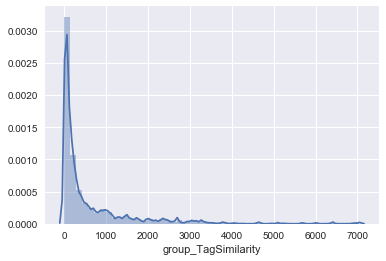

In [29]:
group_TagSimilarity = rec_movieinfo_small.groupby('Algorithm').get_group('TagSimilarity')
x = pd.Series(group_TagSimilarity['popularityLastYear'], name="group_TagSimilarity")
ax = sns.distplot(x)
# ax.set_xlim(0,20)

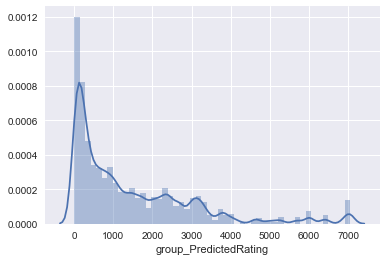

In [21]:
group_PredictedRating = rec_movieinfo_small.groupby('Algorithm').get_group('PredictedRating')
x = pd.Series(group_PredictedRating['popularityLastYear'], name="group_PredictedRating")
ax = sns.distplot(x)
# ax.set_xlim(0,20)

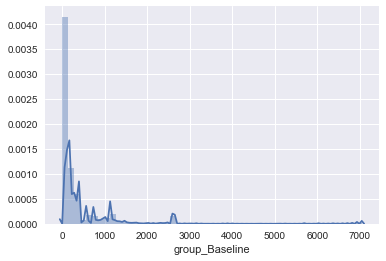

In [22]:
group_Baseline = rec_movieinfo_small.groupby('Algorithm').get_group('Baseline')
x = pd.Series(group_Baseline['popularityLastYear'], name="group_Baseline")
ax = sns.distplot(x) 
# ax.set_xlim(0,20)

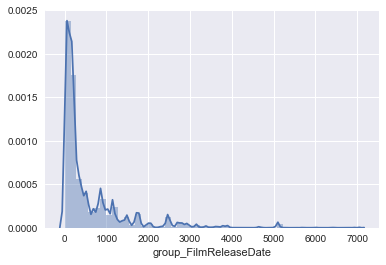

In [23]:
group_FilmReleaseDate = rec_movieinfo_small.groupby('Algorithm').get_group('FilmReleaseDate')
x = pd.Series(group_FilmReleaseDate['popularityLastYear'], name="group_FilmReleaseDate")
ax = sns.distplot(x) 
# ax.set_xlim(0,20)

(0, 40000)

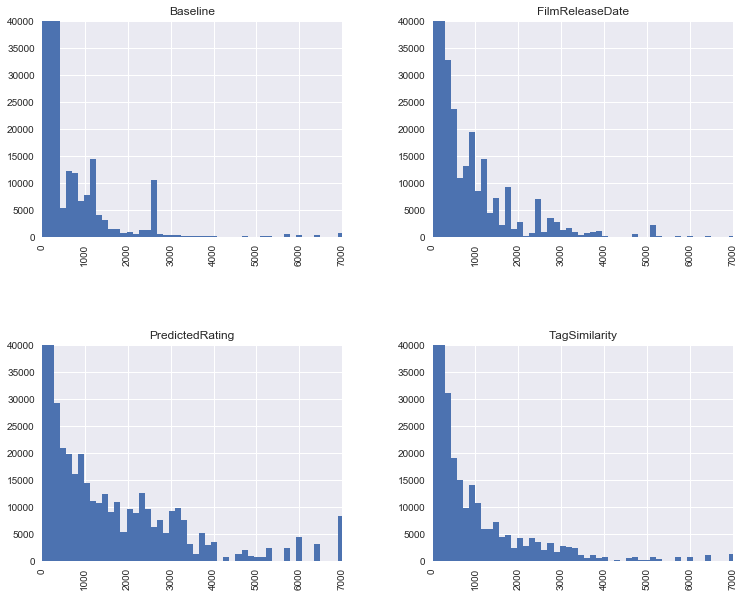

In [24]:
# Zoom in and set the same range for all graphs
as_list = rec_movieinfo_small['popularityLastYear'].hist(by=rec_movieinfo_small['Algorithm'],figsize=(12,10),bins=50)

as_list[0][0].set_xlim(0,7000)
as_list[0][0].set_ylim(0,40000)

as_list[0][1].set_xlim(0,7000)
as_list[0][1].set_ylim(0,40000)

as_list[1][0].set_xlim(0,7000)
as_list[1][0].set_ylim(0,40000)

as_list[1][1].set_xlim(0,7000)
as_list[1][1].set_ylim(0,40000)

### Distribution of avgRating of all recommendations

(0, 30000)

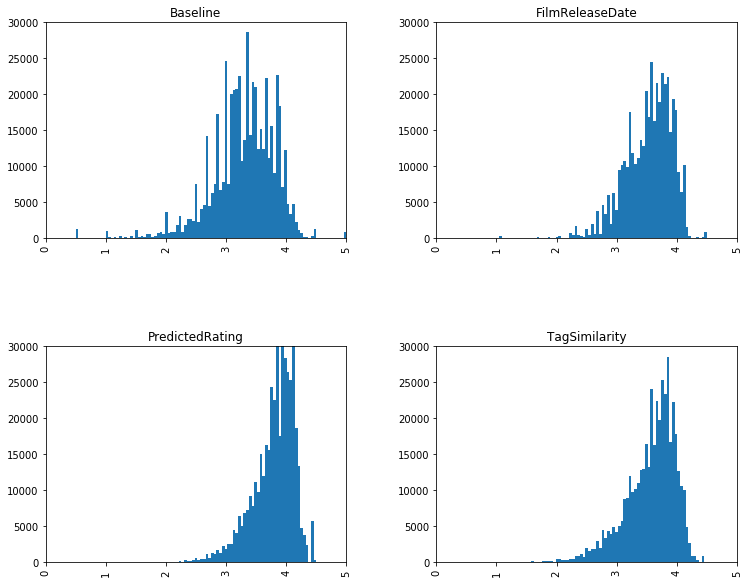

In [21]:
# x = np.random.randn(1000, 3)

as_list = rec_movieinfo_small['avgRating'].hist(by=rec_movieinfo_small['Algorithm'],figsize=(12,10),bins=100)

# The code below works, but the font size is really small
# g = sns.FacetGrid(movie_data_rec_small, col="recommenderId", col_wrap=2, size=10)
# g = g.map(plt.hist, "popularity", bins=100)

as_list[0][0].set_xlim(0,5)
as_list[0][0].set_ylim(0,30000)
as_list[0][1].set_xlim(0,5)
as_list[0][1].set_ylim(0,30000)
as_list[1][0].set_xlim(0,5)
as_list[1][0].set_ylim(0,30000)
as_list[1][1].set_xlim(0,5)
as_list[1][1].set_ylim(0,30000)

#### Boxplot of avgRating, broken down by algorithms 

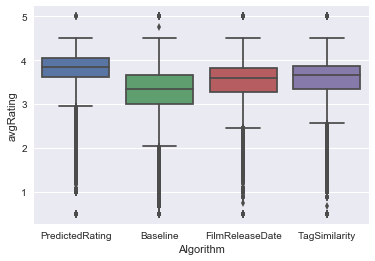

In [30]:
sns.boxplot(x='Algorithm', y='avgRating', data= rec_movieinfo_small)

#### Distribution of the age (until 1.19) of all recommendations ###

#### Boxplot

(0, 1000)

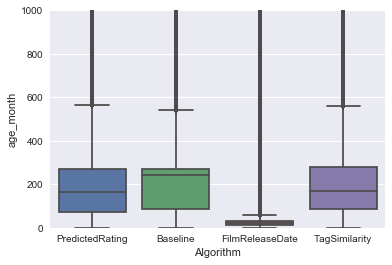

In [31]:
# Boxplot
sns.boxplot(x='Algorithm', y='age_month', data = rec_movieinfo_small)
plt.ylim(0, 1000)

(0, 40000)

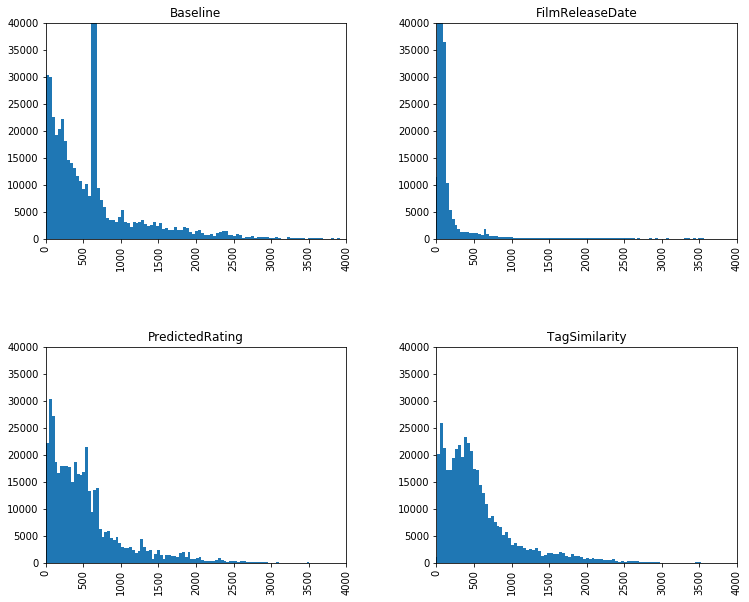

In [24]:
as_list = rec_movieinfo_small['age_month'].hist(by=rec_movieinfo_small['Algorithm'],figsize=(12,10),bins=100)

# The code below works, but the font size is really small
# g = sns.FacetGrid(movie_data_rec_small, col="recommenderId", col_wrap=2, size=10)
# g = g.map(plt.hist, "popularity", bins=100)

as_list[0][0].set_xlim(0,4000)
as_list[0][0].set_ylim(0,40000)
as_list[0][1].set_xlim(0,4000)
as_list[0][1].set_ylim(0,40000)
as_list[1][0].set_xlim(0,4000)
as_list[1][0].set_ylim(0,40000)
as_list[1][1].set_xlim(0,4000)
as_list[1][1].set_ylim(0,40000)
